# House Loan Data Analysis with Deep Learning
This notebook analyzes loan data to predict defaults using a deep learning model. Missing data is handled before training.

## Step 1: Load the dataset

In [106]:
import pandas as pd

loan_data = pd.read_csv("loan_data.csv", encoding="ISO-8859-1")
data_dict = pd.read_csv("Data_Dictionary.csv", encoding="ISO-8859-1")

loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 2: Check for missing values (EDA)

Shape of DataFrame: (307511, 122)

Column data types:
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Missing value percentage per column:
 SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: f

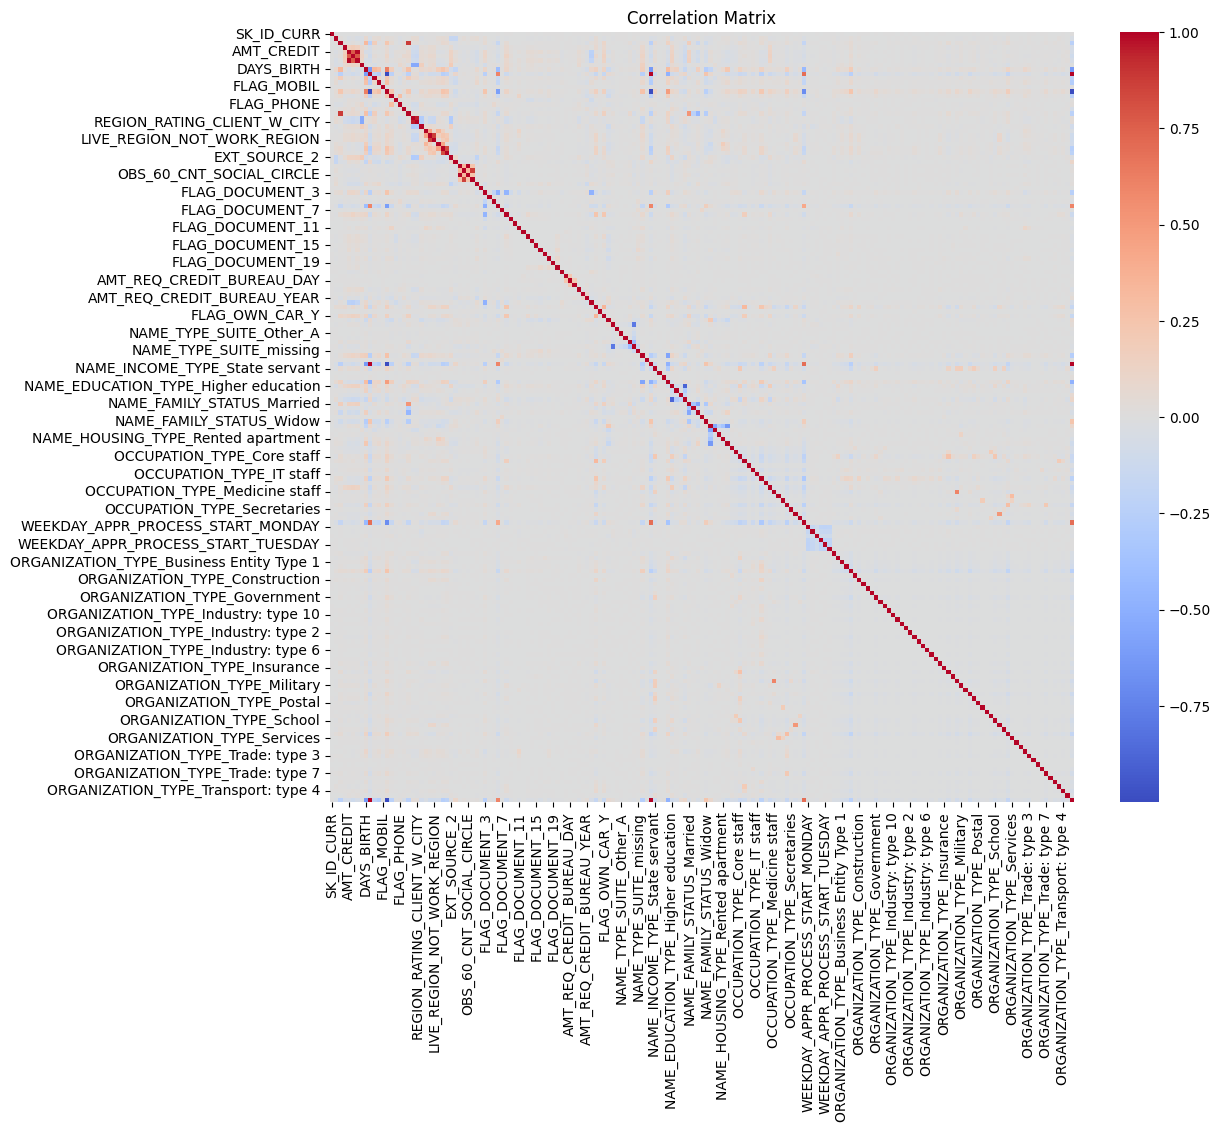

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0


In [88]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer


# a. Check size of the DataFrame
print("Shape of DataFrame:", loan_data.shape)

# b. Check columns and their data types
print("\nColumn data types:\n", loan_data.dtypes)

# c. Check number of missing values per column (as %)
missing_percent = loan_data.isnull().mean() * 100
print("\nMissing value percentage per column:\n", missing_percent)

# c.1 Drop columns with more than 40% missing
cols_to_drop = missing_percent[missing_percent > 40].index
print("\nDropping columns with >40% missing values:\n", list(cols_to_drop))
loan_data.drop(columns=cols_to_drop, inplace=True)

# c.2 Impute columns with <=40% missing
for col in loan_data.columns:
    if loan_data[col].isnull().sum() > 0:
        if loan_data[col].dtype in ['float64', 'int64']:
            # use mean or median based on distribution
            if loan_data[col].skew() > 1:
                imputer = SimpleImputer(strategy='median')
            else:
                imputer = SimpleImputer(strategy='mean')
            loan_data[col] = imputer.fit_transform(loan_data[[col]])
        else:
            # For flags or categoricals: fill with 0 or 'missing'
            loan_data[col] = loan_data[col].fillna('missing')

# d. Check and encode categorical columns
categorical_cols = loan_data.select_dtypes(include=['object']).columns
print("\nCategorical columns:\n", categorical_cols.tolist())

# Apply one-hot encoding
loan_data_encoded = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

# e. Correlation matrix (for numeric columns)
plt.figure(figsize=(12, 10))
sns.heatmap(loan_data_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

loan_data.isnull().sum().sort_values(ascending=False)


Columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOC

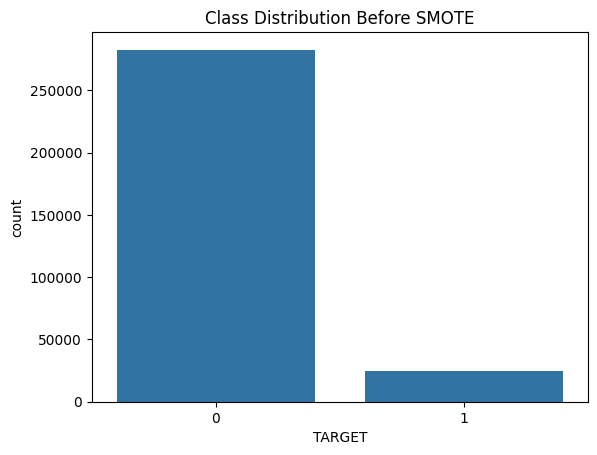

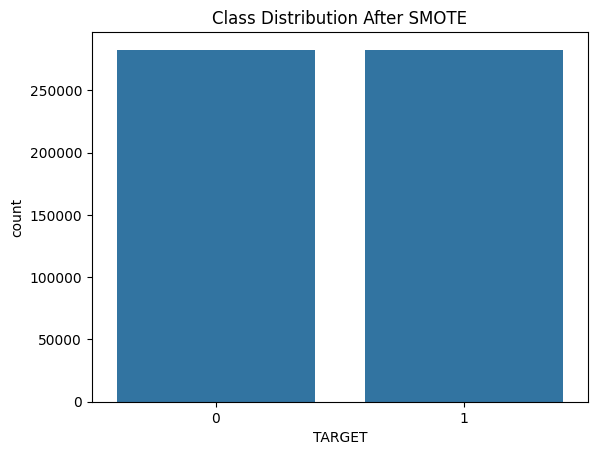

After SMOTE: Counter({1: 282686, 0: 282686})


In [89]:
## SMOTE to make the data balanced

from imblearn.over_sampling import SMOTE
from collections import Counter

# Cleaning up column names
loan_data_encoded.columns = loan_data_encoded.columns.str.strip()

# Confirming TARGET
print("Columns:", loan_data_encoded.columns.tolist())
assert 'TARGET' in loan_data_encoded.columns

# Get X and y
X = loan_data_encoded.drop('TARGET', axis=1)
X = X.select_dtypes(include=['number'])
y = loan_data_encoded['TARGET']

# Check for NaNs
assert X.isnull().sum().sum() == 0, "X contains NaNs"
assert y.isnull().sum() == 0, "y contains NaNs"

# Plot before
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.show()

# Applying SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Plot after
sns.countplot(x=y_smote)
plt.title("Class Distribution After SMOTE")
plt.show()

# Confirm balance
print("After SMOTE:", Counter(y_smote))


## Step 3: Analyze Target Class Distribution

In [105]:
# Count and normalize the TARGET column
default_counts = df['TARGET'].value_counts(normalize=True) * 100

# Format and print
print("Loan Repayment Status:")
print(f"No Default (TARGET = 0): {default_counts[0]:.2f}%")
print(f"Default (TARGET = 1): {default_counts[1]:.2f}%")


Loan Repayment Status:
No Default (TARGET = 0): 91.93%
Default (TARGET = 1): 8.07%


## Step 4: Balance the dataset using upsampling

In [91]:
from sklearn.utils import resample

df_majority = loan_data[loan_data.TARGET == 0]
df_minority = loan_data[loan_data.TARGET == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
balanced_data = pd.concat([df_majority, df_minority_upsampled])
balanced_data['TARGET'].value_counts()

,count
TARGET,
0,282686
1,282686


## Step 5: Plot balanced class distribution

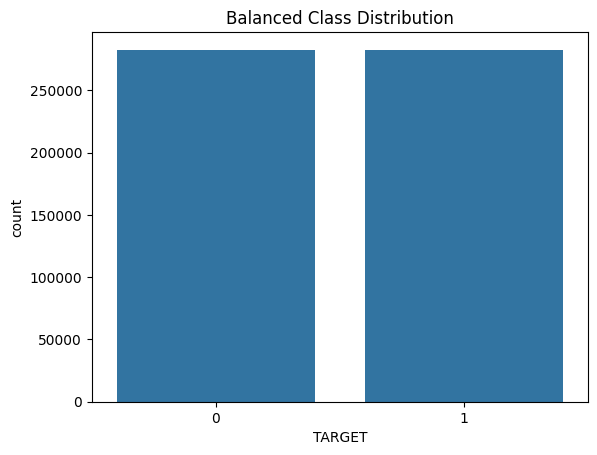

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=balanced_data)
plt.title("Balanced Class Distribution")
plt.show()

## Step 6: Encode categorical variables

In [93]:
categorical_cols = balanced_data.select_dtypes(include='object').columns
balanced_encoded = pd.get_dummies(balanced_data, columns=categorical_cols, drop_first=True)
balanced_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,False,False,False,False,False,False,False,False,False,False


## Step 7: Split, Impute missing values, and Scale

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = balanced_encoded.drop("TARGET", axis=1)
y = balanced_encoded["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
training_columns = X_train.columns  # Save column names before transformation
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 8: Build and train a deep learning model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'), # Hidden layer 1
    Dense(32, activation='relu'),                             # Hidden layer 2
    Dense(1, activation='sigmoid')                            # Output layer (binary classification)
])

# input dimension
input_dim = X_train.shape[1]
print(f"input dimension: {input_dim:.4f}")


# Compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Error formula = binary cross entropy

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# loss accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


input dimension: 174.0000
Epoch 1/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.6724 - loss: 0.6063 - val_accuracy: 0.6933 - val_loss: 0.5800
Epoch 2/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.7016 - loss: 0.5713 - val_accuracy: 0.7079 - val_loss: 0.5614
Epoch 3/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7186 - loss: 0.5488 - val_accuracy: 0.7163 - val_loss: 0.5485
Epoch 4/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.7314 - loss: 0.5321 - val_accuracy: 0.7270 - val_loss: 0.5378
Epoch 5/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7402 - loss: 0.5185 - val_accuracy: 0.7323 - val_loss: 0.5321
Epoch 6/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7470 - loss: 0.5090 - val_accuracy: 0.7355 - val_loss: 0.5267
Epoch 7/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.7525 - loss: 0.5004 - val_accuracy: 0.7397 - val_loss: 0.5201
Epoch 8/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━

## Step 9: Evaluate model performance

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     56574
           1       0.73      0.78      0.75     56501

    accuracy                           0.74    113075
   macro avg       0.74      0.74      0.74    113075
weighted avg       0.74      0.74      0.74    113075



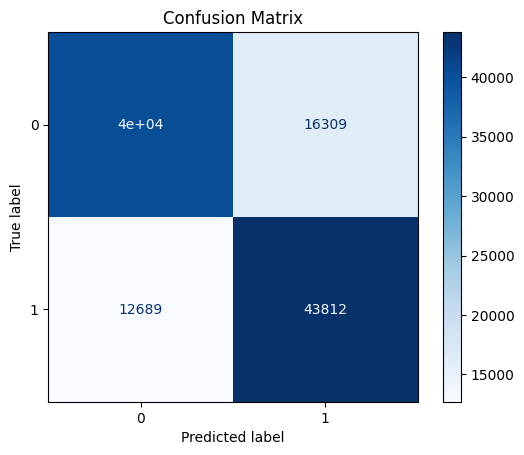

Sensitivity (Recall): 0.7754
AUC-ROC: 0.8196


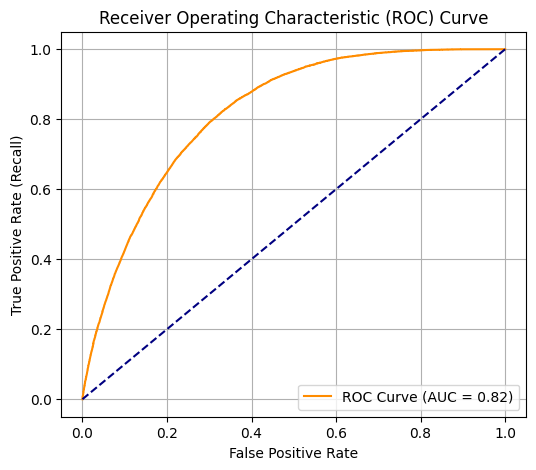

In [96]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# 1. Clean predictions
y_pred_prob = model.predict(X_test).flatten()
mask = ~np.isnan(y_pred_prob)

y_test_clean = y_test[mask]
y_pred_prob_clean = y_pred_prob[mask]
y_pred_clean = (y_pred_prob_clean > 0.5).astype(int)

# 2. Sensitivity and AUC
cm = confusion_matrix(y_test_clean, y_pred_clean)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
auc = roc_auc_score(y_test_clean, y_pred_prob_clean)

# 3. Classification report
print("Classification Report:\n")
print(classification_report(y_test_clean, y_pred_clean))

# 4. Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_clean, y_pred_prob_clean)
roc_auc = roc_auc_score(y_test_clean, y_pred_prob_clean)

print("Sensitivity (Recall):", round(sensitivity, 4))
print("AUC-ROC:", round(roc_auc, 4))

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [97]:
# Function to predict loan default for a new applicant
def predict_new_applicant(new_applicant_dict, training_columns):
    import pandas as pd
    import numpy as np

    # Step 1: Convert dictionary to DataFrame
    new_applicant_df = pd.DataFrame([new_applicant_dict])

    # Step 2: One-hot encode categorical variables
    new_applicant_encoded = pd.get_dummies(new_applicant_df)

    # Step 3: Align with training columns using reindex
    new_applicant_encoded = new_applicant_encoded.reindex(columns=training_columns, fill_value=0)

    # Step 4: Impute and scale
    new_applicant_imputed = imputer.transform(new_applicant_encoded)
    new_applicant_scaled = scaler.transform(new_applicant_imputed)

    # Step 5: Predict
    prob = model.predict(new_applicant_scaled)[0][0]
    prediction = int(prob > 0.5)

    print(f"Predicted Default Probability: {prob:.4f}")
    print(f" Prediction: {'Default' if prediction == 1 else 'No Default'}")

    return prob, prediction


In [98]:
import pandas as pd

# Load dataset
df = pd.read_csv("loan_data.csv", encoding="ISO-8859-1")

# Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Build example input dictionary
sample_applicant = {}

# Add numeric fields using median
for col in numerical_cols:
    sample_applicant[col] = df[col].median()

# Add categorical fields using first non-null category
for col in categorical_cols:
    sample_applicant[col] = df[col].dropna().unique()[0] if df[col].notnull().sum() > 0 else "example"

# Show sample input dictionary data
sample_applicant



{'SK_ID_CURR': 278202.0,
 'TARGET': 0.0,
 'CNT_CHILDREN': 0.0,
 'AMT_INCOME_TOTAL': 147150.0,
 'AMT_CREDIT': 513531.0,
 'AMT_ANNUITY': 24903.0,
 'AMT_GOODS_PRICE': 450000.0,
 'REGION_POPULATION_RELATIVE': 0.01885,
 'DAYS_BIRTH': -15750.0,
 'DAYS_EMPLOYED': -1213.0,
 'DAYS_REGISTRATION': -4504.0,
 'DAYS_ID_PUBLISH': -3254.0,
 'OWN_CAR_AGE': 9.0,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 1.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_CONT_MOBILE': 1.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'CNT_FAM_MEMBERS': 2.0,
 'REGION_RATING_CLIENT': 2.0,
 'REGION_RATING_CLIENT_W_CITY': 2.0,
 'HOUR_APPR_PROCESS_START': 12.0,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NOT_WORK_REGION': 0.0,
 'LIVE_REGION_NOT_WORK_REGION': 0.0,
 'REG_CITY_NOT_LIVE_CITY': 0.0,
 'REG_CITY_NOT_WORK_CITY': 0.0,
 'LIVE_CITY_NOT_WORK_CITY': 0.0,
 'EXT_SOURCE_1': 0.5059979305057544,
 'EXT_SOURCE_2': 0.5659614260608526,
 'EXT_SOURCE_3': 0.5352762504724826,
 'APARTMENTS_AVG': 0.0876,
 'BASEMENTAREA_AVG': 0.0763,
 'YEARS_BEGINEXPLUA

In [99]:
# predict loan default for this new applicant (sample_applicant)
predict_new_applicant(sample_applicant, training_columns=training_columns)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Default Probability: 0.6181
 Prediction: Default


(np.float32(0.6180955), 1)

In [100]:
# Creating a modified safe version of sample_applicant
safe_applicant = sample_applicant.copy()

# Increase income significantly
safe_applicant['AMT_INCOME_TOTAL'] = 300000

# Reduce loan amount
safe_applicant['AMT_CREDIT'] = 100000

# Improve external risk scores
safe_applicant['EXT_SOURCE_1'] = 0.95
safe_applicant['EXT_SOURCE_2'] = 0.98
safe_applicant['EXT_SOURCE_3'] = 0.93

# Improve age (younger = higher number of negative days)
safe_applicant['DAYS_BIRTH'] = -12000  # ~32 years old

# Shorter unemployment (better job status)
safe_applicant['DAYS_EMPLOYED'] = -300  # recently employed

# Predict
predict_new_applicant(safe_applicant, training_columns=training_columns)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Default Probability: 0.0004
 Prediction: No Default


(np.float32(0.00039388565), 0)

In [101]:
# Finding safe candidates
safe_candidates = non_defaulters[
    (non_defaulters['AMT_INCOME_TOTAL'] > 150000) &
    (non_defaulters['AMT_CREDIT'] < 200000) &
    (non_defaulters['EXT_SOURCE_2'] > 0.7) &
    (non_defaulters['DAYS_EMPLOYED'] > -1000)
]

print(f"Found {len(safe_candidates)} candidates.")

if not safe_candidates.empty:
    real_safe_applicant = safe_candidates.iloc[0].drop("TARGET").to_dict()
    predict_new_applicant(real_safe_applicant, training_columns=training_columns)
else:
    print("No suitable applicant found.")


Found 409 candidates.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Default Probability: 0.0094
 Prediction: No Default
